# 2.5 The Insulin Minimal Model

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

## The Insulin Model

In previous notebooks, we've studied and implemented the glucose minimal model.  Now we'll implement the other half of the Minimal Model.  In the glucose minimal model, we created a function $I(t)$ from data, and used that as input as we attempted to model glucose levels $G$ and tissue insulin $X$.  Here, however, we use experimental data to create the input $G(t)$, and attempt to model the total insulin levels $I$.   

<br>

Notice that the insulin model builds a relationship only between $G$ and $I$, rather than amongst $G$, $I$, and $X$.  Because we are assuming a level of $G$ defined by experimental data $G(t)$, we don't need to worry about how much the insulin is reducing glucose (and thus how much is in the blood vs.  the tissue fluid).  Here we are only interested in how glucose in the blood stream prods the body to change insulin production.

<br>

The code hidden in the next cell imports the glucose and insulin data as the DataFrame `data` with columns called `glucose` and `insulin`.

In [3]:
# @title
# Import the glucose and insulin data
import pandas as pd
import numpy as np

filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/glucose_insulin.xlsx'
data = pd.read_excel(filename, index_col=0)
data.columns = ['glucose', 'insulin']

### Part I (Investigation)

The simplified system that we are modeling leads to a simplified system.  In the insulin minimal model, the concentration of insulin, $I(t)$, is governed by a single differential equatino:

<br>

$ \frac{dI}{dt} = -k I(t) + \gamma (G(t) - G_T) t $

<br>

where $G(t)$ is the concentration of glucose at time $t$, and
$k$, $\gamma$, and $G_T$ are positive-valued parameters.  $G_T$ is the glucose threshold, which plays a role similar to $G_B$ in the glucose model.


✅ A. Explain the first term of the right hand side in terms of its effect on the differential equation.

✅ ✅  Answer A here

<br>

✅ B. Given its effect on the equation, what do you think the first term represents in the physical system?

✅ ✅  Answer B here

<br>

✅ C. Explain the second term of the right hand side in terms of its effect on the differential equation.  What does the fact that $t$ appears in the equation mean? (It might help to think of the coeffienct as $\gamma t$.)

✅ ✅  Answer C here

<br>

✅ D. What does this term represent in the physical system?  

✅ ✅  Answer D here

### Part 2 Running a Simulation

The code here, which looks a lot like notebook 2.5.6, simulates the change in insulin levels in response to glucose levels in the blood.  Notice that while before we used measured data about the insulin levels to find `G` and `X`, here we are using measured data for glucose levels to find `I`.

<br>

The parameters here are not very good: that is, the simulated insulin levels don't match the measured insulin data very well.   The questions in part 3 will ask you to look at the differential equation to tweak those values to get a better fit.

<br>

Before you move on to Part 3, add the comments here to explain what is happening in the code



In [85]:
# Define make_system
def make_system(I0, k,gamma,G_T, data):
    # Add comment  to explain next 3 lines
    t_0 = data.index[0]
    t_end = data.index[-1]
    dt = (t_end-t_0)/(data.glucose.size - 1)

    return dict(I0=I0, k=k, gamma=gamma,G_T=G_T, G=data.glucose, t_0=t_0, t_end=t_end, dt=dt)

In [87]:
# Define a change function
def change_func(t, state, system):
    # Add comment to explain the following line
    G = system['G']

    # Add comment to explain the following two lines
    dIdt = - system['k']*state.loc['I'] + gamma * (G[t] - system['G_T']) * t
    state.loc['I'] = state.loc['I'] + dIdt * system['dt']
    return state

In [55]:
def run_simulation(system, change_func):
    state = pd.Series(dict(I = system['I0']),dtype=np.float64)
    t_array = np.arange(system['t_0'], system['t_end']+1, system['dt'])
    n = len(t_array)

    # Add comment to explain the following two lines
    results = pd.DataFrame(index=t_array, columns=state.index,
                        dtype=np.float64)
    results.iloc[0] = state

    for i in range(n-1):
        t = t_array[i]
        results.iloc[i+1] = change_func(t, state, system)

    return results

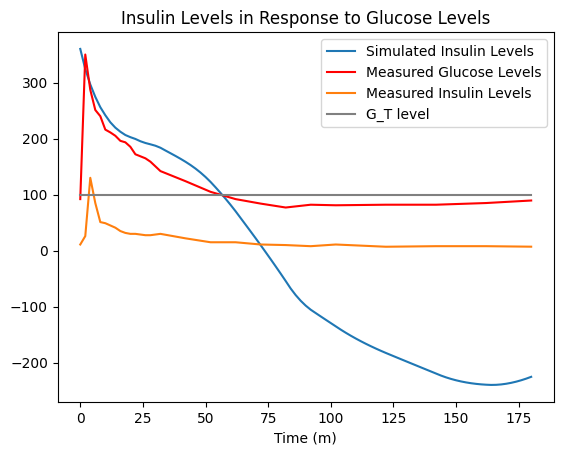

In [92]:
# Run the simulation (remember that 'results' is a DataFrame)
I0 = 360
k = 0.05
gamma = 0.005
G_T = 100

# Define simulation parameters based on data

system = make_system(I0, k,gamma,G_T,data)
results = run_simulation(system, change_func)
G_T_series = pd.Series(index=data.index, data = G_T)
results.I.plot(label = 'Simulated Insulin Levels', legend = True)
data.glucose.plot(legend=True, title = 'Insulin Levels in Response to Glucose Levels',
                  color = 'red', label = 'Measured Glucose Levels');
data.insulin.plot(legend=True, label = 'Measured Insulin Levels')
G_T_series.plot(color = 'gray',legend=True, label = 'G_T level');


### Part 3 Analysis

The code in this section is set up to allow you to make changes to parameters and to see the results quickly; no need to change the code, as it is identical to the code above. Answer the questions below by "playing" with the model.

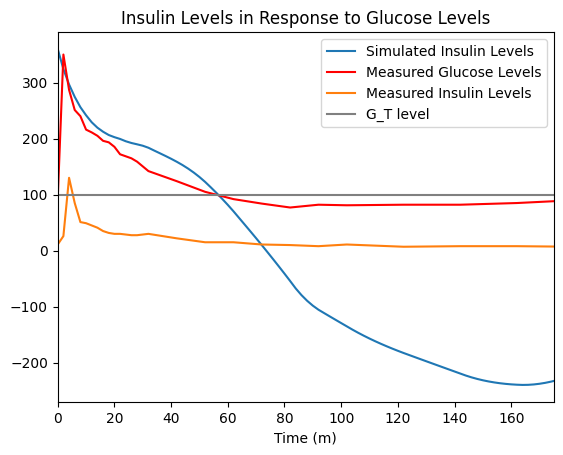

In [108]:
# Run the simulation (remember that 'results' is a DataFrame)
I0 = 360
k = 0.05
gamma = 0.005
G_T = 100

# Define simulation parameters based on data

system = make_system(I0, k,gamma,G_T,data)
results = run_simulation(system, change_func)
G_T_series = pd.Series(index=data.index, data = G_T)
results.I.plot(label = 'Simulated Insulin Levels', legend = True, xlim = [0,175])
data.glucose.plot(legend=True, title = 'Insulin Levels in Response to Glucose Levels',
                  color = 'red', label = 'Measured Glucose Levels');
data.insulin.plot(legend=True, label = 'Measured Insulin Levels')
G_T_series.plot(color = 'gray',legend=True, label = 'G_T level');

$$ \frac{dI}{dt} = -k I(t) + \gamma (G(t) - G_T) t $$

<br>


✅ A.  We want to make a simulation of the insulin levels that matches the actual measured insulin levels.  Look at the parameters and think about what each of them does.   You might be able to guess at a good `I0` and `G_T` just by observation.   Then play with `k` and `gamma` to see if you get the simulated insulin to match the measured data.   What are your four "best" parameters?  (Don't worry about getting an exact answer; but for the rest of the questions, use your improved parameters.)

<br>

✅ ✅  Answer A here

<br>

✅ B.  This model attempts to predict how the body will react to glucose levels by producing insulin.  Put this relationship between glucose and insulin levels in your own words.  What *happens* in this plot?

✅ ✅  Answer B here

<br>

✅ C. Which term in the differential equation "dominates" the behavior of the insulin levels? In other words, which is most important to the overall behavior of the insulin production? To test, set k=0 and run, and then set gamma = 0, and do the same.  

✅ ✅  Answer C here

<br>

✅ D. Given your observations in the previous question, try to explain why the insulin levels suddenly start to change after $t\approx 160$.  How does the answer to the previous question depend on which "region" of the plot you are looking at?

✅ ✅  Answer D here

<br>

✅ E. What happens to insulin levels between $t=15$ and $t=50$?  How are the two terms in the equation interacting here?

✅ ✅  Answer E here

